In [39]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import os
import pickle

def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 18
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()


# Single file

In [27]:
# Open the JSON file in read mode
with open('BSGcommissioning2023/optimiser_run_test2023-03-23 13:48:17.624690.json', 'r') as f:
    # Load the contents of the file as a JSON object
    data = json.load(f)

# Extract the values and mismatches
values = data[1][3]
mismatches = data[1][5]

# Define the column names
names = ["logical.BT.QNO10/K",
    "logical.BT.QNO20/K",
    "logical.BT.QNO30/K",
    "logical.BT.QNO40/K",
    "logical.BT.QNO50/K",
    "logical.BTP.QNO10/K",
    "logical.BTP.QNO20/K",
    "logical.BTP.QNO30/K",
    "logical.BTP.QNO35/K",
    "logical.BTP.QNO50/K",
    "logical.BTP.QNO55/K",
    "logical.BTP.QNO60/K",
    "BT.QNO10/MEAS.PULSE#VALUE",
    "BT.QNO20/MEAS.PULSE#VALUE",
    "BT.QNO30/MEAS.PULSE#VALUE",
    "BT.QNO40/MEAS.PULSE#VALUE",
    "BT.QNO50/MEAS.PULSE#VALUE",
    "BTP.QNO10/MEAS.PULSE#VALUE",
    "BTP.QNO20/MEAS.PULSE#VALUE",
    "BTP.QNO30/MEAS.PULSE#VALUE",
    "BTP.QNO35/MEAS.PULSE#VALUE",
    "BTP.QNO50/MEAS.PULSE#VALUE",
    "BTP.QNO55/MEAS.PULSE#VALUE",
    "BTP.QNO60/MEAS.PULSE#VALUE"]

# Define the new column names
new_column_names = ['mismatch_h', 'mismatch_v']

# Create an empty DataFrame with the column names
dfp = pd.DataFrame(columns=names + new_column_names)

# Create a dictionary with the values and their corresponding column names
datap = {}
for i, name in enumerate(names):
    datap[name] = [values[i]]

# Add the mismatches to the dictionary
datap[new_column_names[0]] = [mismatches[0]]
datap[new_column_names[1]] = [mismatches[1]]

# Add the row to the DataFrame
dfp = dfp.append(pd.DataFrame(datap), ignore_index=True)

# Display the DataFrame
dfp


logical.BT.QNO10/K  logical.BT.QNO20/K  logical.BT.QNO30/K  \
0            0.667499           -0.631588            0.287083   

   logical.BT.QNO40/K  logical.BT.QNO50/K  logical.BTP.QNO10/K  \
0              0.4863           -0.438674                  0.0   

   logical.BTP.QNO20/K  logical.BTP.QNO30/K  logical.BTP.QNO35/K  \
0              0.73136            -0.680055             0.760967   

   logical.BTP.QNO50/K  ...  BT.QNO50/MEAS.PULSE#VALUE  \
0             0.238219  ...                 -169.58139   

   BTP.QNO10/MEAS.PULSE#VALUE  BTP.QNO20/MEAS.PULSE#VALUE  \
0                    0.001494                  284.440582   

   BTP.QNO30/MEAS.PULSE#VALUE  BTP.QNO35/MEAS.PULSE#VALUE  \
0                 -264.077393                  296.188812   

   BTP.QNO50/MEAS.PULSE#VALUE  BTP.QNO55/MEAS.PULSE#VALUE  \
0                   91.997299                 -177.019318   

   BTP.QNO60/MEAS.PULSE#VALUE  mismatch_h  mismatch_v  
0                  181.028259     0.55377    0.300728  

[1 rows x 26 columns]

In [16]:
data[0]

['objective',
 'frev',
 'data_psb',
 'data_btp',
 'tbt_raw',
 'tbt_obj',
 'tbt_mu',
 'tbt_sigma',
 'tbt_sigma_filtered',
 'fit_params',
 'r2',
 'intensity_br',
 'intensity_bt',
 'intensity_btp']

In [26]:
data[1][5]

[0.5537700992260761, 0.30072821968085006]

In [23]:
data[1][7]

[{'__type__': 'np.ndarray',
  'data': [5.816466467344599,
   6.6032956811627805,
   5.052167808800184,
   5.70823658552083,
   5.720363906152042,
   6.075022678910071,
   6.733895692488045,
   5.179274207251222,
   6.677551006952814,
   6.2009476025610715,
   6.151202600319373,
   6.666445530050221,
   5.559743328986012,
   7.0690608616986985,
   6.425348824494385,
   6.181750194261486,
   6.6117546931993365,
   5.9916797331094775,
   7.07559213560385,
   6.418964194811923]},
 {'__type__': 'np.ndarray',
  'data': [2.457971831255271,
   2.2736396713156353,
   2.4683797523059208,
   2.29642678498577,
   2.505410516124819,
   2.4592037191090177,
   2.6724956099713557,
   2.552601000003607,
   2.630399840193629,
   2.705431723314364,
   2.74917777747514,
   2.8583062285308407,
   2.789678098743971,
   2.973681768088126,
   2.944481246098331,
   3.0088933427855062,
   3.1148709347539585,
   3.274052784320647,
   3.231079008135571,
   3.1969959523535025]}]

In [ ]:
fig, ax = plt.subplots()

ax.plot(data[1][7])

# All the data

In [28]:
# Set the path to the directory containing the JSON files
json_dir = 'BSGcommissioning2023/'

# Get a list of all the JSON files in the directory
json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

# Create an empty DataFrame with the column names
names = ["logical.BT.QNO10/K",
         "logical.BT.QNO20/K",
         "logical.BT.QNO30/K",
         "logical.BT.QNO40/K",
         "logical.BT.QNO50/K",
         "logical.BTP.QNO10/K",
         "logical.BTP.QNO20/K",
         "logical.BTP.QNO30/K",
         "logical.BTP.QNO35/K",
         "logical.BTP.QNO50/K",
         "logical.BTP.QNO55/K",
         "logical.BTP.QNO60/K",
         "BT.QNO10/MEAS.PULSE#VALUE",
         "BT.QNO20/MEAS.PULSE#VALUE",
         "BT.QNO30/MEAS.PULSE#VALUE",
         "BT.QNO40/MEAS.PULSE#VALUE",
         "BT.QNO50/MEAS.PULSE#VALUE",
         "BTP.QNO10/MEAS.PULSE#VALUE",
         "BTP.QNO20/MEAS.PULSE#VALUE",
         "BTP.QNO30/MEAS.PULSE#VALUE",
         "BTP.QNO35/MEAS.PULSE#VALUE",
         "BTP.QNO50/MEAS.PULSE#VALUE",
         "BTP.QNO55/MEAS.PULSE#VALUE",
         "BTP.QNO60/MEAS.PULSE#VALUE",
         "mismatch_h",
         "mismatch_v"]
df = pd.DataFrame(columns=names)

# Loop through each JSON file and append its data to the DataFrame
for json_file in json_files:
    if "2023-03-23" in json_file:
        with open(json_dir + json_file, 'r') as f:
            data = json.load(f)
            values = data[1][3]
            mismatches = data[1][5]
            data_dict = {}
            for i, name in enumerate(names[:-2]):
                data_dict[name] = [values[i]]
            data_dict["mismatch_h"] = mismatches[0]
            data_dict["mismatch_v"] = mismatches[1]
            df = df.append(pd.DataFrame(data_dict), ignore_index=True)

# Display the final DataFrame
df


logical.BT.QNO10/K  logical.BT.QNO20/K  logical.BT.QNO30/K  \
0              0.667478           -0.631600            0.287090   
1              0.667478           -0.631600            0.287090   
2              0.667478           -0.631600            0.287090   
3              0.667478           -0.631600            0.287090   
4              0.667478           -0.631600            0.287090   
..                  ...                 ...                 ...   
858            0.667499           -0.631588            0.287083   
859            0.667499           -0.631588            0.287083   
860            0.667499           -0.631588            0.287083   
861            0.667499           -0.631588            0.287083   
862            0.667499           -0.631588            0.287083   

     logical.BT.QNO40/K  logical.BT.QNO50/K  logical.BTP.QNO10/K  \
0                0.4863           -0.438674                  0.0   
1                0.4863           -0.438674                  0.0   
2                0.4863           -0.438674                  0.0   
3                0.4863           -0.438674                  0.0   
4                0.4863           -0.438674                  0.0   
..                  ...                 ...                  ...   
858              0.4863           -0.438674                  0.0   
859              0.4863           -0.438674                  0.0   
860              0.4863           -0.438674                  0.0   
861              0.4863           -0.438674                  0.0   
862              0.4863           -0.438674                  0.0   

     logical.BTP.QNO20/K  logical.BTP.QNO30/K  logical.BTP.QNO35/K  \
0               0.696533            -0.682474             0.774016   
1               0.696533            -0.682474             0.774016   
2               0.696533            -0.682474             0.774016   
3               0.696533            -0.682474             0.774016   
4               0.696533            -0.682474             0.774016   
..                   ...                  ...                  ...   
858             0.731360            -0.680055             0.766309   
859             0.731360            -0.680055             0.755684   
860             0.731360            -0.680055             0.754795   
861             0.731360            -0.680055             0.756067   
862             0.731360            -0.680055             0.756867   

     logical.BTP.QNO50/K  ...  BT.QNO50/MEAS.PULSE#VALUE  \
0               0.250757  ...                -169.581024   
1               0.250757  ...                -169.581818   
2               0.250757  ...                -169.582336   
3               0.250757  ...                -169.580963   
4               0.250757  ...                -169.581116   
..                   ...  ...                        ...   
858             0.244621  ...                -169.582031   
859             0.244364  ...                -169.581650   
860             0.245746  ...                -169.581696   
861             0.243806  ...                -169.581055   
862             0.242738  ...                -169.581329   

     BTP.QNO10/MEAS.PULSE#VALUE  BTP.QNO20/MEAS.PULSE#VALUE  \
0                     -0.001025                  270.618195   
1                      0.001232                  270.620117   
2                     -0.001494                  270.617676   
3                     -0.000371                  270.618469   
4                      0.001276                  270.617126   
..                          ...                         ...   
858                   -0.002018                  284.440125   
859                    0.002181                  284.439392   
860                   -0.000055                  284.440063   
861                    0.001101                  284.439819   
862                   -0.000338                  284.441040   

     BTP.QNO30/MEAS.PULSE#VALUE  BTP.QNO35/MEAS.PULSE#VALUE  \
0

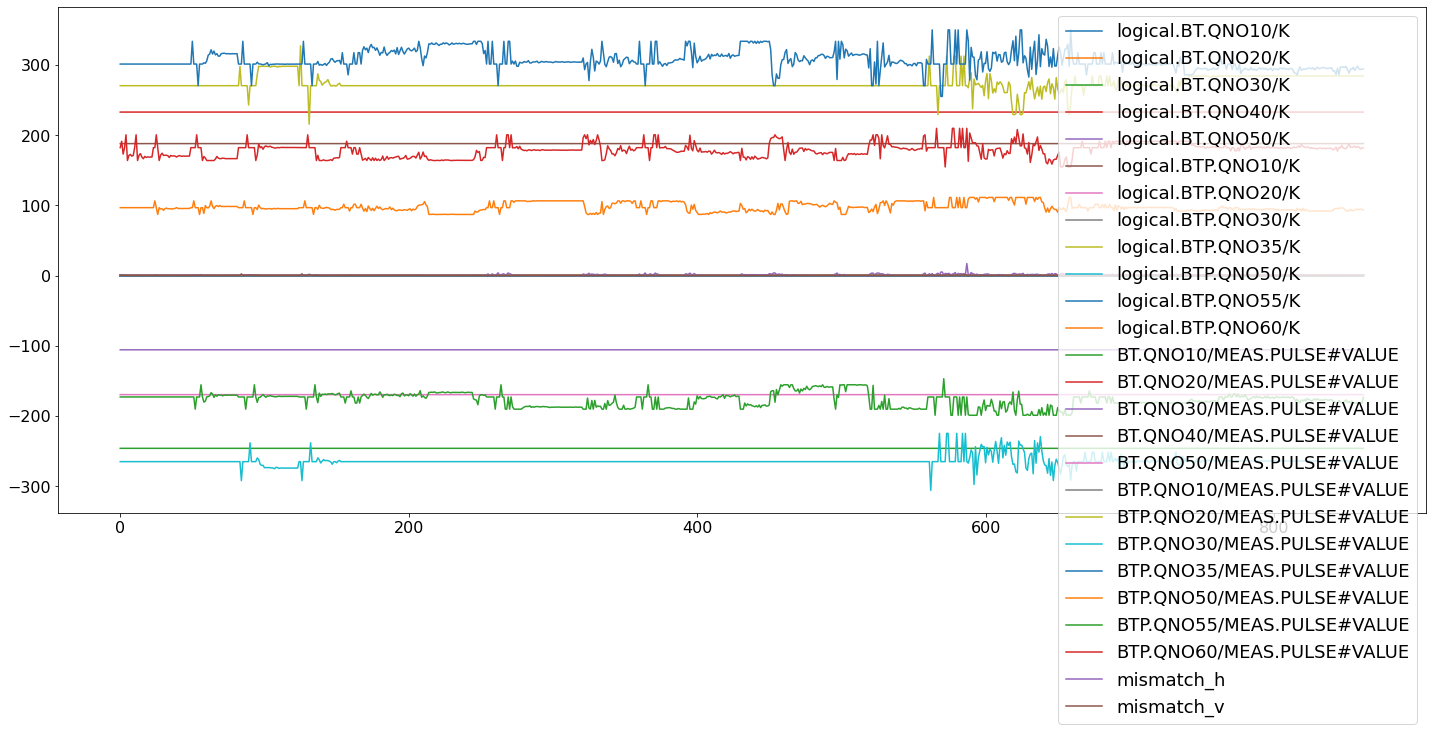

In [29]:
fig, ax = plt.subplots(tight_layout=True, figsize=(20,10))

for key in df.keys():
    ax.plot(df[key], label = key)
ax.legend()

In [30]:
df.keys()

Index(['logical.BT.QNO10/K', 'logical.BT.QNO20/K', 'logical.BT.QNO30/K',
       'logical.BT.QNO40/K', 'logical.BT.QNO50/K', 'logical.BTP.QNO10/K',
       'logical.BTP.QNO20/K', 'logical.BTP.QNO30/K', 'logical.BTP.QNO35/K',
       'logical.BTP.QNO50/K', 'logical.BTP.QNO55/K', 'logical.BTP.QNO60/K',
       'BT.QNO10/MEAS.PULSE#VALUE', 'BT.QNO20/MEAS.PULSE#VALUE',
       'BT.QNO30/MEAS.PULSE#VALUE', 'BT.QNO40/MEAS.PULSE#VALUE',
       'BT.QNO50/MEAS.PULSE#VALUE', 'BTP.QNO10/MEAS.PULSE#VALUE',
       'BTP.QNO20/MEAS.PULSE#VALUE', 'BTP.QNO30/MEAS.PULSE#VALUE',
       'BTP.QNO35/MEAS.PULSE#VALUE', 'BTP.QNO50/MEAS.PULSE#VALUE',
       'BTP.QNO55/MEAS.PULSE#VALUE', 'BTP.QNO60/MEAS.PULSE#VALUE',
       'mismatch_h', 'mismatch_v'],
      dtype='object')

Text(0, 0.5, 'logical.BTP.QNO55/K')

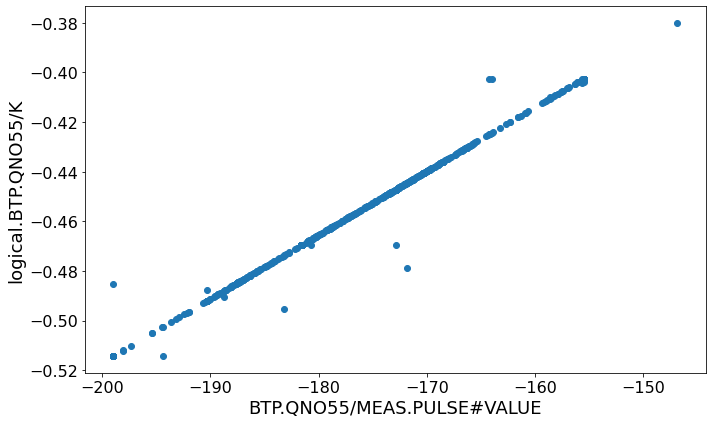

In [31]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10,6))

ax.scatter(df['BTP.QNO55/MEAS.PULSE#VALUE'], df['logical.BTP.QNO55/K'])
ax.set_xlabel('BTP.QNO55/MEAS.PULSE#VALUE')
ax.set_ylabel('logical.BTP.QNO55/K')

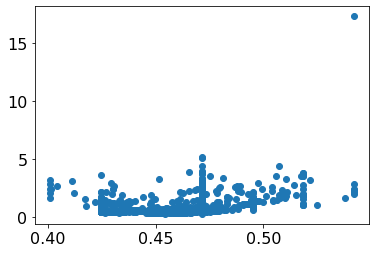

In [34]:
fig, ax = plt.subplots()

ax.scatter(df['logical.BTP.QNO60/K'], df["mismatch_h"])

In [36]:
df.keys()

Index(['logical.BT.QNO10/K', 'logical.BT.QNO20/K', 'logical.BT.QNO30/K',
       'logical.BT.QNO40/K', 'logical.BT.QNO50/K', 'logical.BTP.QNO10/K',
       'logical.BTP.QNO20/K', 'logical.BTP.QNO30/K', 'logical.BTP.QNO35/K',
       'logical.BTP.QNO50/K', 'logical.BTP.QNO55/K', 'logical.BTP.QNO60/K',
       'BT.QNO10/MEAS.PULSE#VALUE', 'BT.QNO20/MEAS.PULSE#VALUE',
       'BT.QNO30/MEAS.PULSE#VALUE', 'BT.QNO40/MEAS.PULSE#VALUE',
       'BT.QNO50/MEAS.PULSE#VALUE', 'BTP.QNO10/MEAS.PULSE#VALUE',
       'BTP.QNO20/MEAS.PULSE#VALUE', 'BTP.QNO30/MEAS.PULSE#VALUE',
       'BTP.QNO35/MEAS.PULSE#VALUE', 'BTP.QNO50/MEAS.PULSE#VALUE',
       'BTP.QNO55/MEAS.PULSE#VALUE', 'BTP.QNO60/MEAS.PULSE#VALUE',
       'mismatch_h', 'mismatch_v'],
      dtype='object')

In [40]:
keys = ['logical.BTP.QNO20/K', 'logical.BTP.QNO30/K', 'logical.BTP.QNO35/K',
       'logical.BTP.QNO50/K', 'logical.BTP.QNO55/K', 'logical.BTP.QNO60/K','mismatch_h', 'mismatch_v']
df_subset = df.loc[:, keys]
with open('optimizer_data.pickle', 'wb') as handle:
    pickle.dump(df_subset, handle, protocol=pickle.HIGHEST_PROTOCOL)